# Pymaceuticals Inc.
---

### Analysis

- It seems that the heavier the mouse the less effective the treaments are. You can see this realtionship by looking at the scatter plot with the regression line. 

- Only one drug had an outlier, Infubinol, which you can see on the box plot. This shows that the drugs are overall reliable. 

-It also shows in the bar plots that Ramicane and Capomulin are very similar in success and data overall. 
 

In [33]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

#print staring data frames
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [2]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [3]:
# Combine the data into a single DataFrame
combined_data_df=pd.merge(mouse_metadata, study_results, how='outer', on="Mouse ID")

# Display the data table for preview
combined_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
# Checking the number of mice.
mouse_count = combined_data_df["Mouse ID"].nunique()
mouse_count

249

In [5]:
#Remove Duplicates

In [6]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_type=combined_data_df.loc[combined_data_df.duplicated(subset=["Mouse ID","Timepoint"]),"Mouse ID"].unique()
duplicate_mice_type

array(['g989'], dtype=object)

In [7]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_type_df=combined_data_df.loc[combined_data_df["Mouse ID"]=='g989',:]
duplicate_mice_type_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
updated_data_df=combined_data_df[combined_data_df["Mouse ID"].isin(duplicate_mice_type)==False]
updated_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [9]:
# Checking the number of mice in the clean DataFrame.
new_mouse_count=updated_data_df['Mouse ID'].nunique()
new_mouse_count

248

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean = updated_data_df['Tumor Volume (mm3)'].groupby(updated_data_df['Drug Regimen']).mean()
median = updated_data_df['Tumor Volume (mm3)'].groupby(updated_data_df['Drug Regimen']).median()
variance = updated_data_df['Tumor Volume (mm3)'].groupby(updated_data_df['Drug Regimen']).var()
std_dev = updated_data_df['Tumor Volume (mm3)'].groupby(updated_data_df['Drug Regimen']).std()
sem = updated_data_df['Tumor Volume (mm3)'].groupby(updated_data_df['Drug Regimen']).sem()

summary_stat_df=pd.DataFrame({"Mean Tumor Volume":mean,
                             "Median Tumor Volume":median,
                             "Tumor Volume Variance": variance,
                             "Tumor Volume Std. Dev.": std_dev,
                             "Tumor Volume Std. Err.": sem})

summary_stat_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)(I'll do both for fun)

# Using the aggregation method, produce the same summary statistics in a single line
summary_two_df=updated_data_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean','median','var','std','sem'])
summary_two_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [12]:
#Number of mice per drug regimen
mice_per_regimen=updated_data_df['Drug Regimen'].value_counts()
mice_per_regimen

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

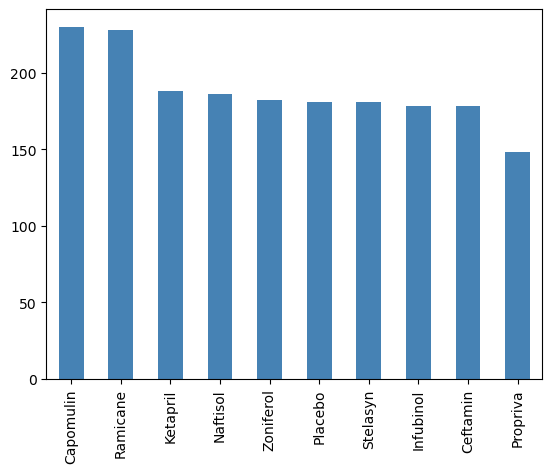

In [13]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
data_plot=mice_per_regimen.plot.bar(color='steelblue')
plt.xlabel=('Drug Regimen')
plt.ylabel=('# of Observed Mouse Timepoints')

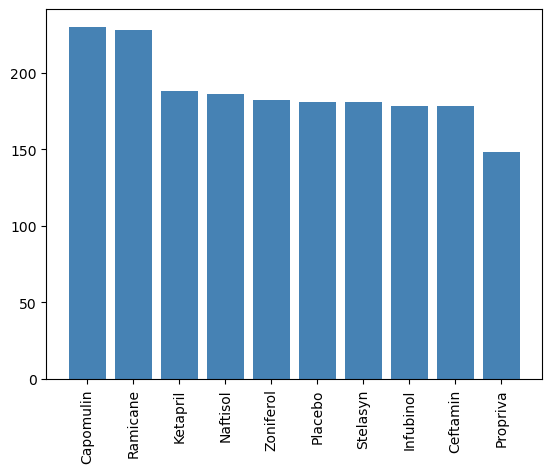

In [14]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis=mice_per_regimen.index.values
y_axis=mice_per_regimen.values

plt.bar(x_axis, y_axis, color='steelblue', align='center')

plt.xlabel=('Drug Regimen')
plt.ylabel=('# of Observed Mouse Timepoints')
plt.xticks(rotation='vertical')

plt.show()

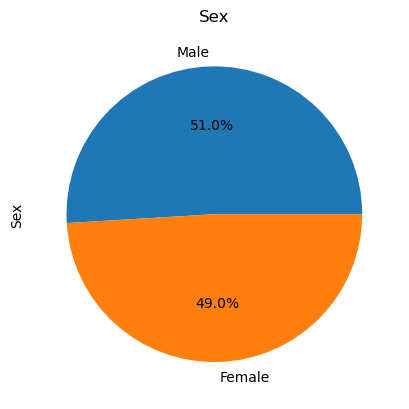

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
genders=updated_data_df['Sex'].value_counts()

plt.title('Sex')
genders.plot.pie(autopct='%1.1f%%')
plt.show()

In [16]:
#Data Printed
genders

Male      958
Female    922
Name: Sex, dtype: int64

In [17]:
#Percentage
#958/1880*100=50.9574468
#922/1880*100=49.045532

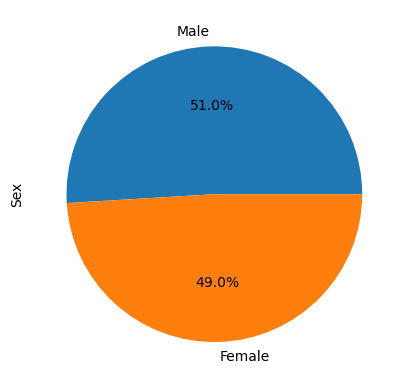

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels=['Female', 'Male']
sizes=[49.045532,50.9574468]
plot=genders.plot.pie(y='Total Count', autopct='%1.1f%%')
plt.show()

## Quartiles, Outliers and Boxplots

In [19]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
Capomulin_df=updated_data_df.loc[updated_data_df['Drug Regimen']=='Capomulin',:]
Ramicane_df=updated_data_df.loc[updated_data_df['Drug Regimen']=='Ramicane',:]
Infubinol_df=updated_data_df.loc[updated_data_df['Drug Regimen']=='Infubinol',:]
Ceftamin_df=updated_data_df.loc[updated_data_df['Drug Regimen']=='Ceftamin',:]

# Start by getting the last (greatest) timepoint for each mouse
Capomulin_last=Capomulin_df.groupby('Mouse ID').max()['Timepoint']
Ramicane_last=Ramicane_df.groupby('Mouse ID').max()['Timepoint']
Infubinol_last=Infubinol_df.groupby('Mouse ID').max()['Timepoint']
Ceftamin_last=Ceftamin_df.groupby('Mouse ID').max()['Timepoint']

#Tumor Volume DataFrames
Capomulin_vol=pd.DataFrame(Capomulin_last)
Ramicane_vol=pd.DataFrame(Ramicane_last)
Infubinol_vol=pd.DataFrame(Infubinol_last)
Ceftamin_vol=pd.DataFrame(Ceftamin_last)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
Capomulin_merge=pd.merge(Capomulin_vol, updated_data_df, on=('Mouse ID', 'Timepoint'), how='left')
Ramicane_merge=pd.merge(Ramicane_vol, updated_data_df, on=('Mouse ID', 'Timepoint'), how='left')
Infubinol_merge=pd.merge(Infubinol_vol, updated_data_df, on=('Mouse ID', 'Timepoint'), how='left')
Ceftamin_merge=pd.merge(Ceftamin_vol, updated_data_df, on=('Mouse ID', 'Timepoint'), how='left')


In [20]:
Capomulin_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [21]:
Capomulin_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [22]:
Ramicane_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,45,Ramicane,Male,3,22,38.407618,1
1,a444,45,Ramicane,Female,10,25,43.047543,0
2,a520,45,Ramicane,Male,13,21,38.810366,1
3,a644,45,Ramicane,Female,7,17,32.978522,1
4,c458,30,Ramicane,Female,23,20,38.342008,2


In [23]:
Infubinol_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a577,30,Infubinol,Female,6,25,57.031862,2
3,a685,45,Infubinol,Male,8,30,66.083066,3
4,c139,45,Infubinol,Male,11,28,72.226731,2


In [24]:
Ceftamin_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2


In [25]:
#Test
Capomulin_tumors=Capomulin_merge['Tumor Volume (mm3)']

quartiles = Capomulin_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(lowerq)
print(upperq)
print(iqr)
print(lower_bound)
print(upper_bound)

32.37735684
40.1592203
7.781863460000004
20.70456164999999
51.83201549


In [26]:
drug_list=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
drugs=combined_data_df[combined_data_df['Drug Regimen'].isin(drug_list)]
drugs.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [27]:
last_timepoint=drugs.groupby(["Drug Regimen", "Mouse ID"]).agg(tumor_size=("Tumor Volume (mm3)", lambda x: x.iloc[-1]))
last_timepoint = last_timepoint.stack(level=0).unstack(level=0)
for drug in drug_list:
    print(drug)

Capomulin
Ramicane
Infubinol
Ceftamin


In [28]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
treatment=0
for drug in drug_list:
    quartiles=last_timepoint[drug].quantile([.25,.5,.75]).round(2)
    lowerq=quartiles[0.25].round(2)
    upperq=quartiles[0.75].round(2)
    iqr = round(upperq-lowerq, 2)
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)
    
    if treatment == 0:
        print(f"--------------------------------------")
    print(f"The lower quartile of {drug} treatment is: {lowerq}")
    print(f"The upper quartile of {drug} treatment is: {upperq}")
    print(f"The interquartile rage of {drug} treatment is: {iqr}")
    print(f"Values below {lower_bound} and above {upper_bound} could be {drug} outliers")
    print(f"---------------------------------------")
    treatment+=1
        


--------------------------------------
The lower quartile of Capomulin treatment is: 32.38
The upper quartile of Capomulin treatment is: 40.16
The interquartile rage of Capomulin treatment is: 7.78
Values below 20.71 and above 51.83 could be Capomulin outliers
---------------------------------------
The lower quartile of Ramicane treatment is: 31.56
The upper quartile of Ramicane treatment is: 40.66
The interquartile rage of Ramicane treatment is: 9.1
Values below 17.91 and above 54.31 could be Ramicane outliers
---------------------------------------
The lower quartile of Infubinol treatment is: 54.05
The upper quartile of Infubinol treatment is: 65.53
The interquartile rage of Infubinol treatment is: 11.48
Values below 36.83 and above 82.75 could be Infubinol outliers
---------------------------------------
The lower quartile of Ceftamin treatment is: 48.72
The upper quartile of Ceftamin treatment is: 64.3
The interquartile rage of Ceftamin treatment is: 15.58
Values below 25.35 and 

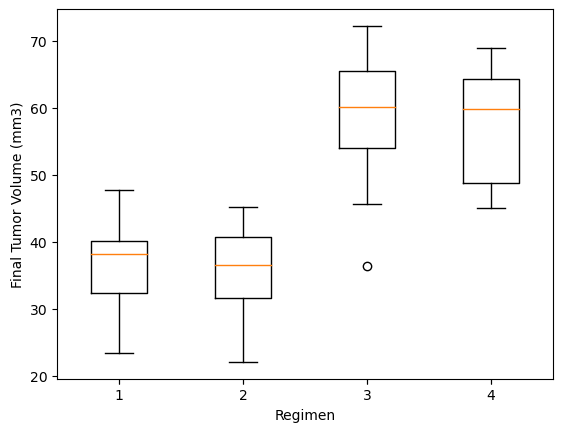

In [46]:
boxplot_list=[]
for drug in drug_list:
    boxplot_list.append(list(last_timepoint[drug].dropna()))
    
fig1, ax1 = plt.subplots()
ax1.set_xlabel('Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')
plt.xticks([1,2,3,4])
ax1.boxplot(boxplot_list)
plt.show()

## Line and Scatter Plots

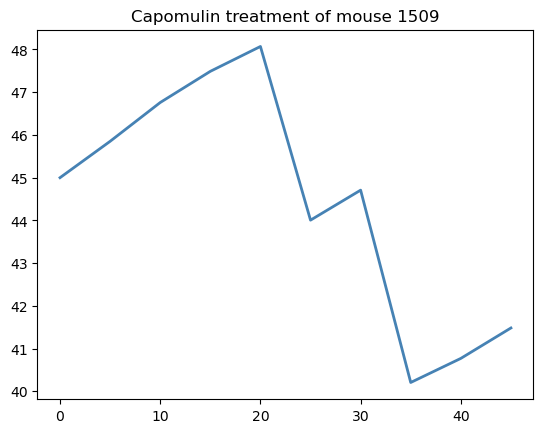

In [47]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
line_plot_df = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "l509",:]
line_plot_df
x_axis = line_plot_df["Timepoint"]
tumor_vol = line_plot_df["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
plt.title('Capomulin treatment of mouse 1509')
plt.plot(x_axis, tumor_vol, linewidth=2, color='steelblue')


/var/folders/5g/v11rbfhj62q2mbrkmz1wsst40000gn/T/ipykernel_60154/317749295.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_capm_vol =Capomulin_df.groupby(['Mouse ID']).mean()


Text(0, 0.5, 'Averag Tumor Volume (mm3)')

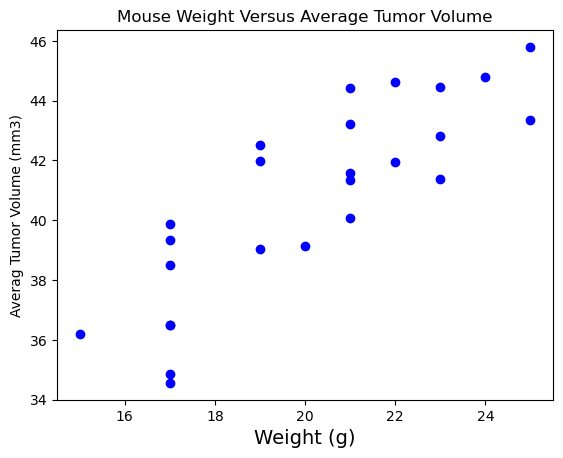

In [49]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
fig1, ax1 = plt.subplots()
avg_capm_vol =Capomulin_df.groupby(['Mouse ID']).mean()

marker_size=15
plt.scatter(avg_capm_vol['Weight (g)'],avg_capm_vol['Tumor Volume (mm3)'], color="blue")
ax1.set_title('Mouse Weight Versus Average Tumor Volume')
ax1.set_xlabel('Weight (g)',fontsize =14)
ax1.set_ylabel('Averag Tumor Volume (mm3)')


## Correlation and Regression

In [50]:
# Calculacorrelation = st.pearsonr(avg_capm_vol['Weight (g)'],avg_capm_vol['Tumor Volume (mm3)'])
correlation = st.pearsonr(avg_capm_vol['Weight (g)'],avg_capm_vol['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

The correlation between mouse weight and the average tumor volume is 0.84


The r-squared is: 0.709


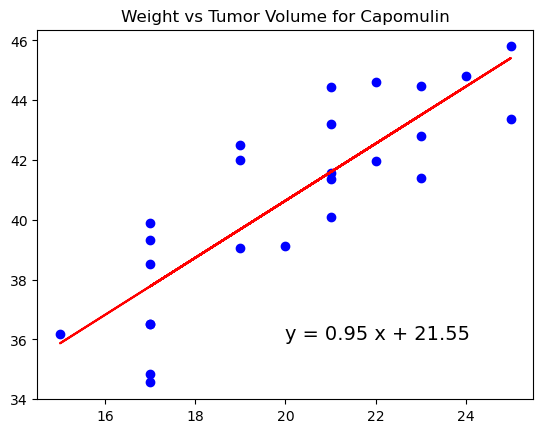

In [54]:
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
x_values=avg_capm_vol['Weight (g)']
y_values=avg_capm_vol['Tumor Volume (mm3)']
(slope, intercept,rvalue, pvalue, stderr)= linregress(x_values,y_values)
regress_values=x_values* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(avg_capm_vol["Weight (g)"],avg_capm_vol["Tumor Volume (mm3)"],color='b')
plt.plot(avg_capm_vol["Weight (g)"], regress_values, color='red')
plt.annotate(line_eq,(20,36), fontsize=14)
#plt.xlabel("Weight (g)")
#plt.ylabel("Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume for Capomulin")
print(f"The r-squared is: {round(rvalue**2,3)}")
plt.show()